(ch:probability-continuous)=
# 연속 확률분포(준비중)

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

이산 확률 분포의 주요 개념을 소개한다.

- 연속 확률 변수
- 연속 확률 분포
- 누적 분포 함수
- 확률 밀도 함수

## 연속 확률 변수

{numref}`%s장 <ch:probability-discrete>`에서 살펴 본 이산 확률 변수는
$x_1$, $x_2$, $x_3$ ... 등의 형식으로 하나, 둘, 셋 하며 셀 수 있는 
**이산형 값**<font size='2'>discrete value</font>을 취한다.

예를 들어 하나의 정상적인 주사위를 던졌을 때 나오는 값을 가리키는 확률 변수는
1, 2, 3, 4, 5, 6 중에 하나를 취하고,
캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 소득 범주를 가리키는 확률 변수는
1, 2, 3, 4, 5 중에 하나를 취한다.
그리고 어느 학급의 수학 시험 점수를 가리키는 확률 변수는 0부터 100까지의 정수 중에 하나를 취한다.

반면에 **연속 확률 변수**<font size='2'>continuous random variable</font>는 
일정 구간에 속한 임의의 실수를 가리킨다.
여기서 구간은 0과 1사이 등 구간의 크기가 유한할 수도 있지만
0보다 큰 모든 실수, 아니면 그냥 모든 실수 처럼 구간의 크기가 무한일 수도 있다.

예를 들어 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 가구중위소득은
0.4999에서 15.0001 사이의 실수로 구성된다.
그리고 대학생의 학점 평균으로 구성된 데이터셋은 0에서 4.5 사이의 실수로 구성된다.

:::{admonition} 실수와 부동소수점
:class: note

프로그래밍에서 실수는 부동소수점으로 표현된다.
부동소수점은 엄밀히 말해 유한소수만 다루지만 여기서는 특별한 의미 없이 실수라는 표현을 사용한다.
:::

**이산 확률 분포 대 연속 확률 분포**

이산 확률 분포는 확률 변수가 특정 값을 가리킬 확률을 표 형식으로 표현한다.
예를 들어 아래 표는 정상적인 주사위 하나를 던졌을 때 나오는 값을 가리키는 확률 변수 $X$의 확률 분포다.

| X | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

그리고 {numref}`%s장 <ch:probability-discrete>`에서 살펴 본 아래 표는 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 소득 범주를 가리키는 확률 변수 $X$의 확률 분포다.
1부터 5까지 소득 범주는 중위소득을 0에서 1.5, 1.5에서 3.0, 3.0에서 4.5, 4.5에서 6, 6 이상 등 5개의 구간에 각각 해당한다.

| X | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

반면에 연속 확률 변수가 따르는 확률 분포를 **연속 확률 분포**<font size='2'>continuous probability distribution</font>라 한다.
이산 확률 분포와는 달리 연속 확률 분포는 확률 변수가 특정 값을 취할 확률을 계산하지 않는다.
이유는 연속 확률 변수 $X$가 특정 실수 $x$를 취할 확률은 항상 0이기 때문이다

$$
P(X=x) = 0
$$

예를 들어 0과 1사이의 실수 중에서 무작위로 하나의 값을 취했을 때 그 값이 정확히 0.5일 확률과
캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 중위소득이 정확히 1.999999일 확률 보두 0이다.

연속 확률 분포는 대신 확률 변수가 특정 구간에서 하나의 값을 취할 확률을 계산한다.
0과 1사이에서 무작위로 선택한 값이 0.49에서 0.51 사이일 확률은 0.02, 즉 2%다.
구간 전체의 크기가 1인데 0.49에서 0.51 사이 구간의 크기는 0.02이기 때문이다.
반면에 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 중위소득이 1.5에서 3.0 사이일 확률은 
중위 소득이 2구간에 속할 확률인 0.333011이다.

이처럼 연속 확률 변수는 아래 표현식처럼 특정 구간의 값을 취할 확률을 계산한다.

$$
P(a \le X \le b)
$$

또한 연속 확률 변수가 특정 값을 취할 확률은 0이기에 구간의 끝 포함 여부는 중요하지 않기에
아래 식에서처럼 등호 기호는 생략해도 된다.

$$
P(a \le X \le b) = P(a < X < b) = P(a < X \le b) = P(a \le X < b)
$$

### 누적 분포 함수

0과 1사이의 실수 중에서 구간 $[a, b]$에서 하나의 값을 취할 확률은 $b-a$임을 바로 알 수 있다.
하지만 연속 확률 변수가 특정 구간의 값을 취할 확률을 정확하게 계산하는 일이
일반적으로 그렇게 간단하지 않다.
예를 들어 캘리포니아 주택가격 데이터셋에서 임의로 선택된 구역의 중위소득이 2.0에서 2.1 사이일 확률은 쉽게 알 수 없다.
이유는 해당 구간이 앞서 언급된 구간 어디에도 해당되지 않기 때문이다.

여기서는 **누적 분포 함수**<font size='2'>cumulative distribution function</font>(CDF)를 활용하여
연속 확률 변수가 특정 구간의 값을 취할 확률을 계산하는 방법을 소개한다.
연속 확률 변수 $X$의 누적 분포 함수 $F$는
아래 식에서 처럼 확률 변수 $X$가 특정 값보다 같거나 작은 값을 취할 확률을 계산한다.

$$
F(a) = P(X \le a)
$$

누적 분포 함수가 알려진 경우 연속 확률 변수 $X$가 $a$에서 $b$ 사이의 값을 취할 확률은
다음과 같이 계산된다.
단, $a \le b$를 가정한다.

$$
P(a \le X \le b) = F(b) - F(a)
$$

**예제: 캘리포니아 구역별 중위소득 확률 분포**

확률 변수 $X$가 캘리포니아의 구역별 중위소득을 가리킨다고 할 때
임의로 선택된 구역의 중위소득이 특정 값 이하일 확률을 계산하는 누적 분포 함수 $F$를 
부울 인덱싱을 이용하여 정의할 수 있다.

아래 코드는 캘리포니아 주택가격 데이터셋을 불러온 후에
중위주택가격이 50만을 초과하는 경우는 삭제하고 인덱스를 초기화한다.
최종적으로 중위소득 특성만 남긴다.

In [24]:
housing = pd.read_csv(data_url+"california_housing.csv")

# 중위주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 중위소득 특성만 선택
housing = housing.loc[:, 'median_income']
housing.index.name = 'district'
housing

district
0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
19670    1.5603
19671    2.5568
19672    1.7000
19673    1.8672
19674    2.3886
Name: median_income, Length: 19675, dtype: float64

중위소득을 가리키는 연속 확률 변수 $X$가 특정 값 $a$ 이하의 값을 가질 확률은
중위소득이 $a$보다 같거나 작은 구역의 비율이며,
아래 `F_income()` 함수가 확률 변수 $X$에 대한 누적 분포 함수를 구현한다.

In [8]:
def F_income(a):
    mask = housing <= a # a 보다 같거나 작을 때만 1
    return mask.mean()  # 전체 중에 True 인 지역의 비율 

임의의 구역을 선택했을 때 소득 범주 2에 속할 확률 $P(1.5 < X <= 3.0)$를
`F_income()`을 이용하여 계산하면 앞서 언급한 값과 동일하게 나온다.

In [9]:
F_income(3.0) - F_income(1.5)

0.333011

아래 `P_income()` 함수는 임의로 선택된 구역의 중위소득이 특정 구간에 속할 확률을 계산한다.

In [10]:
def P_income(a, b):
    assert a <= b, f'둘째 인자가 첫째 인자보다 같거나 커야 함'
    
    return F_income(b) - F_income(a)

In [11]:
P_income(1.5, 3.0)

0.333011

앞서 질문했던 임의의 구역을 선택했을 때 중위소득이 2.0에서 2.1 사이일 확률은 약 2.1%로 계산된다.

In [12]:
P_income(2.0, 2.1)

0.020534

**누적 분포 함수의 성질**

연속 확률 변수 $X$가 $x_0$에서 $x_1$ 사이에서만 값을 취한다고 가정하자.
그러면 $X$의 누적 분포 함수$F$는 다음 세 가지 성질을 만족한다.
단, $a, b \in [x_0, x_1]$과 $a \le b$를 가정한다.

$(1)\,\,\, F(a) \le F(b)$

$(2)\,\,\, 0 \le F(a) \le 1$

$(3)\,\,\, \displaystyle \lim_{a \to x_0} F(a) = 0$ 와 $\displaystyle\lim_{a \to x_1} F(a) = 1$

위 식에서 경우에 따라 다음과 같이 $x_0$는 음의 무한대를, $x_1$은 양의 무한대를 가리킬 수 있다.

:::{list-table} 무한대와 구간
:widths: 10 55
:header-rows: 1
:name: infinity

*   - 구간
    - 의미
*   - $[-\infty, \infty]$
    - 모든 실수들의 구간
*   - $[0, \infty]$
    - 음이 아닌 실수들의 구간
*   - $[-\infty, 1]$
    - $1$보다 같거나 작은 모든 실수들의 구간
*   - $[0, 1]$
    - $0$과 $1$ 사이의 모든 실수들의 구간
*   - $[-1, 1]$
    - $-1$과 $1$ 사이의 모든 실수들의 구간
:::

$x_0$ 또는 $x_1$이 각각 음의 무한대와 양의 무한대를 가리키지 않아도 $F(a)$는 
모든 실수 $a$에 대해 정의되었다고 가정할 수 있다.
이유는 구간 $[x_0, x_1]$ 밖에 위치하는 값에 대해서 다음과 같이 정의할 수 있기 때문이다.

- $a \le x_0$인 경우: $F(a) = 0$
- $a \ge x_1$인 경우: $F(a) = 1$

`F_income()` 함수가 앞서 언급한 모든 성질을 만족한다.

$(1)$ `a < b`이면 `housing < a`에서 `True`인 항목은 `housing < b`에서도 참이기에 `F_income(b)`가 `F_income(a)` 보다 같거나 크다.

$(2)$ `mask.mean()`은 `mask.sum()/len(housing)` 이기에 모든 `a`에 대해 `F_income(a)`는 0과 1 사이의 값을 갖는다.

$(3)$ 최소 중위소득과 최대 중위소득에 대한 값도 요구되는 조건이 충족된다.
단, `housing` 데이터셋의 크기가 실제로는 유한하기에 최솟값에 대한 누적 분포 함숫값은 0은 아니다.

In [13]:
F_income(housing.min())

0.000508

실제로 최솟값은 갖는 구역이 10군데인데 그 비율이 계산된다.

In [14]:
housing.value_counts()[housing.min()]

10

In [15]:
housing.value_counts()[housing.min()] / len(housing)

0.000508

하지만 최솟값보다 조금이라도 작은 값에 대해서는 0을 계산한다.

In [16]:
F_income(housing.min() - 1.0e-16)

0.000000

반면에 최댓값에 대해서는 정확하게 1을 계산한다.

In [17]:
F_income(housing.max())

1.000000

조금이라도 큰 값에 대해서도 항상 1을 계산한다.

In [18]:
F_income(housing.max() + 1.0e-16)

1.000000

### 확률 밀도 함수

연속 확률 변수가 특정 구간 내에서 값을 취할 확률을 이용하여
누적 분포 함수의 특정 값 근처에서의 변화율을 계산할 수 있다.

예를 들어 연속 확률 변수 $X$가 임의의 양수 $h$에 대해 구간 $[x, x+h]$에서 값을 취할 확률은 다음과 같다.

$$
F(x + h) - F(x)
$$

위 값을 $h$로 나눈다.

$$
\frac{F(x + h) - F(x)}{h}
$$

함수 $F$가 $x$에서 미분가능하다면 $h$가 0에 수렴할 때 위 식은 
$x$에서 누적 분포 함수의 변화율인 $F'(x)$로 수렴한다.

$$
F'(x) = \lim_{h \to 0}\frac{F(x + h) - F(x)}{h}
$$

$F'$은 함수 $F$의 도함수를 가리키며, $F$가 단조증가함수이기에 $F'(x) \ge 0$ 이다.

대부분의 누적 분포 함수 $F$는 지정된 구간에서 미분가능하다.
그리고 $F$가 구간 $[x_0, x_1]$ 전체에서 미분가능하다면 정적분의 정의에 의해 다음이 성립한다.
아래 식에서 $f$는 도함수 $F'$을 가리킨다.

$$
F(a) = P(X \le a) = P(x_0 < X \le a) = F(a) - F(x_0) = \int_{x_0}^{a} f(x)\, dx
$$

아래 왼편 그림의 내용은 다음과 같다.

- $F(a)$: 빨강 영역. 구간 $[x_0, a]$ 내에서 음이 아닌 값을 갖는 함수 $f$의 그래프와 $x$-축 사이의 면적.
- $P(a \le x \le b)$: 회색 영역. $[a, b]$ 구간 내에서 확률 밀도 함수 $f$의 그래프와 $x$-축 사이의 면적

영역의 변화율을 가리킨다는 의미에서 $f$를 연속 확률 변수 $X$의 
**확률 밀도 함수**<font size='2'>probability density function</font>(PDF)라 부른다.

아래 오른편 그림은 누적 분포 함수의 그래프를 보여준다.
왼편 그림에서 빨간색 면적에 해당하는 값은 일반적으로 늘어진 S자 형태를 띄며
$x$가 작아지면서 0에, 커지면서 1에 수렴한다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/pdf-cdf-1.png" style="width:100%"></div></p>

:::{admonition} 확률 질량 함수 vs. 확률 밀도 함수
:class: note

확률 질량 함수(PMF)는 이산 확률 변수가 특정 값을 취할 확률을 계산한다.
반면에 확률 밀도 함수(PDF)는 연속 확률 변수가 특정 값 이하의 값을 가질 확률의 변화율을 계산한다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/pmf-pdf-cdf.png" style="width:450px"></div></p>
:::

## 균등 분포

...

## 정규 분포

...

**캘리포니아 주택가격 데이터셋: 중위소득**

In [30]:
housing = pd.read_csv(data_url+"california_housing.csv")

# 중위주택가격이 50만1달러 이상인 구역 삭제
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

# 인덱스 초기화
housing = housing.reset_index(drop=True)

# 중위소득 특성만 선택
housing = housing.loc[:, ['median_income']]
housing.index.name = 'district'
housing

,median_income
district,
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
19670,1.5603
19671,2.5568
19672,1.7000


(array([2.509714e-02, 1.315146e-01, 2.491487e-01, 2.686376e-01,
        2.397548e-01, 1.777831e-01, 1.238032e-01, 7.669350e-02,
        4.199215e-02, 2.173216e-02, 1.374034e-02, 4.626848e-03,
        1.331971e-03, 2.173216e-03, 5.608300e-04, 7.010375e-05,
        2.804150e-04, 1.402075e-04, 0.000000e+00, 2.103113e-04]),
 array([ 0.4999 ,  1.22491,  1.94992,  2.67493,  3.39994,  4.12495,
         4.84996,  5.57497,  6.29998,  7.02499,  7.75   ,  8.47501,
         9.20002,  9.92503, 10.65004, 11.37505, 12.10006, 12.82507,
        13.55008, 14.27509, 15.0001 ]),
 <BarContainer object of 20 artists>)

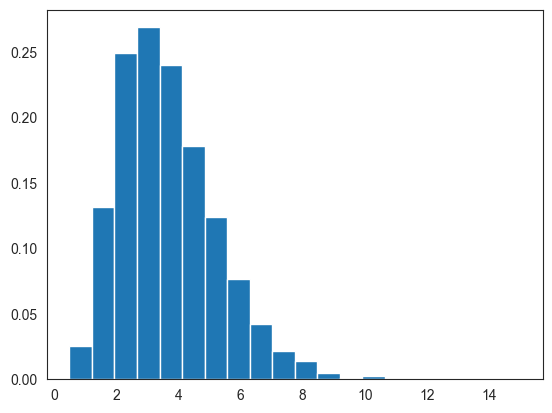

In [55]:
plt.hist(housing.median_income, bins=20, density=True)

In [39]:
import seaborn as sns

In [50]:
sns.set_style("white")

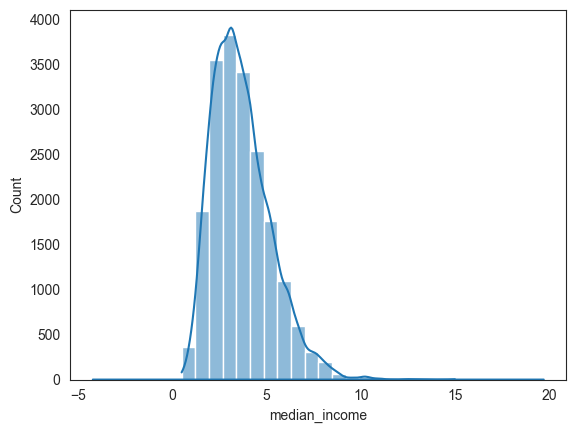

In [63]:
sns.histplot(data=housing.median_income, bins=20, kde=True)
sns.kdeplot(data=housing.median_income, bw_method=1.)

plt.show()

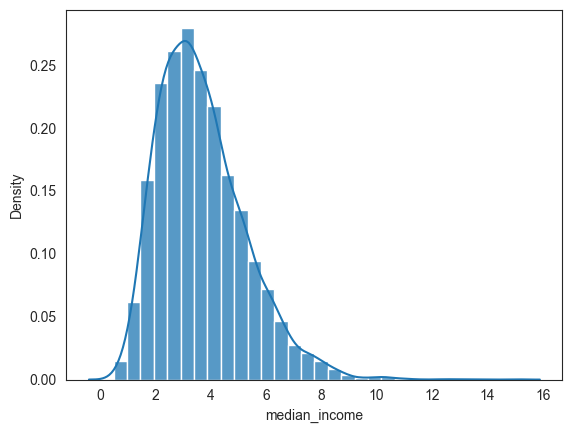

In [121]:
sns.histplot(data=housing.median_income, bins=30, stat='density')
sns.kdeplot(data=housing.median_income, bw_method=.19)

plt.show()

참고:

1. [KDE Plot Visualization with Pandas and Seaborn](https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/)
1. [How to extract density function probabilities in python (pandas kde)](https://stackoverflow.com/questions/63258749/how-to-extract-density-function-probabilities-in-python-pandas-kde)

In [124]:
import scipy.stats

pdf_income = scipy.stats.gaussian_kde(housing.median_income)

In [126]:
pdf_income([1.5])

array([0.11668])

## 다변량 분포

### 연속 결합 확률 분포

**보스턴 주택가격 데이터셋**

보스턴 주택가격 데이터셋은
1978년에 발표된 미국 보스턴 지녁의 총 506개 구역에서 주택 가격에 영향을 미치는 요소들을 수집한 자료를 담고 있다.
구역별 중위주택가격을 포함해서 총 14가지 특성이 포함된다.

:::{list-table} 보스턴 주택가격 데이터셋의 특성
:widths: 15 55
:header-rows: 1
:name: boston

*   - 특성
    - 의미
*   - <font color=#FF0000>CRIM</font>
    - <font color=#FF0000>구역별 1인당 범죄율</font>
*   - ZN
    - 25000 평방 피트 이상의 주거 구역 비율
*   - INDUS
    - 구역별 비소매 사업지(에이커) 비율
*   - CHAS
    - Charles River 인접 여부
*   - NOX
    - 10ppm 당 일산화 질소 농도
*   - RM
    - 주택 당 평균 방의 개수
*   - AGE
     - 1940년 이전에 건축된 소유주택 비율
*   - DIS
    - 보스턴 고용 센터 다섯 군데까지의 접근성 지수
*   - RAD
    - 방사형 고속도로 접근성 지수
*   - TAX
    - 1만달러 당 재산세율
*   - PTRATIO
    - 구역별 학생 대 교사 비율
*   - <font color=#FF0000>B</font> 
    - <font color=#FF0000>1000(Bk - 0.63)^2 (Bk는구역별 흑인 비율)</font>
*   - <font color=#FF0000>LSTAT</font>
    - <font color=#FF0000>구역별 하위 계층 인구 비율</font>
*   - MEDV
    - 자가 주택 중위가격
:::

**보스턴 주택가격 데이터셋 불러오기**

아래는 보스턴 데이터가 저장된 csv 파일의 처음 10줄이다.
각각의 특성은 2, 3개의 공백으로 구분되어 있으며 특성명은 없다.

```
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20
 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70
 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90
 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10
 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50
 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90
 ```

14개 특성의 특성명은 다음과 같다.

In [29]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                'PTRATIO', 'B', 'LSTAT', 'MEDV']

아래 코드는 특성명 정보를 활용하여 보스턴 주택가격 데이터셋을 데이터프레임으로 불러온다.
`pd.read_csv()` 함수 호출에 사용된 키워드 인자는 다음과 같다.

- `header=None`: 특성명 등 데이터 정보를 포함하는 행의 개수. `None`은 그런 행이 없다은 의미임.
- `delimiter=r'\s+`: 특성값 구분 문자열 지정. 기본값은 쉼표이지만 여기서는 한 개 이상의 공백 문자로 구성된 문자열을
    가리키는 정규표현식 지정.
- `names`: 특성명을 담은 리스트 또는 어레이 지정.

In [30]:
boston = pd.read_csv(data_url+"boston_housing.csv", 
                     header=None, 
                     delimiter=r'\s+',
                     names=column_names)

In [31]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 데이터 전처리: 표준화

특성에 따라 사용되는 값들의 크기 정도<font size='2'>scale</font>가 다르다. 
어떤 특성은 0과 1사이의 값을, 다른 특성은 100단위의 값을 포함하기도 한다.
그런데 머신러닝 모델은 기본적으로 모든 특성이 동일한 크기 정도의 
값으로 구성될 때 보다 잘 훈련된다.
이런 이유로 여기서는 평균은 0, 표준편차는 1이 되도록 변환하는
**표준화**<font size='2'>standardization</font>를 적용해서
훈련셋과 테스트셋을 전처리한다.

표준화는 다음 식으로 계산된다. 

$$
\frac{x - \mu}{\sigma}
$$

$x$는 샘플의 특성값을, $\mu$와 $\sigma$는 특성별 평균값과 표준편차를 가리킨다.
넘파이 어레이를 이용하면 전체 훈련셋에 대해 다음처럼 한 번에 표준화를 진행할 수 있다.

```python
# 훈련셋의 특성별 평균값/표준편차
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 훈련셋 표준화
train_data -= mean
train_data /= std
```

## 연습문제

참고: [(연습) 연속 확률 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability_continuous.ipynb)